# AI Lab 14

### Importing Libraries

In [111]:
import time
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

### Generating Dummy Data

In [31]:
np.random.seed(10)

num_points = 1000
start_date = datetime(2022, 1, 1)
timestamps = [start_date + timedelta(hours=i) for i in range(num_points)]

# Ensure a balanced distribution for failure (40% failure, 60% non-failure)
failure = np.random.choice([0, 1], num_points, p=[0.6, 0.4])

# Adjusted ranges and distributions for other features
temperature = np.random.uniform(20, 30, num_points)
vibration = np.random.uniform(0.01, 0.1, num_points)
usage_hours = np.random.randint(400, 800, num_points)
maintenance_type = np.random.choice(['Preventive', 'Corrective'], num_points)
maintenance_cost = np.random.uniform(500, 1500, num_points)

data = {
    'Timestamp': timestamps,
    'Temperature': temperature,
    'Vibration': vibration,
    'UsageHours': usage_hours,
    'MaintenanceType': maintenance_type,
    'MaintenanceCost': maintenance_cost,
    'Failure': failure
}

df = pd.DataFrame(data)

### Displaying Dummy Data and Creating CSV

In [32]:
# Save the dataset to a CSV file
df.to_csv('predictive_maintenance_dataset.csv', index=False)

## 1 - EXPLORATORY DATA ANALYSIS

### Loading and reading dataset 

In [23]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("predictive_maintenance_dataset.csv")

# Display the first few rows of the DataFrame to get an initial overview
df.head()

,Timestamp,Temperature,Vibration,UsageHours,MaintenanceType,MaintenanceCost,Failure
0,2022-01-01 00:00:00,29.841919,0.074113,702,Corrective,506.597391,0
1,2022-01-01 01:00:00,23.334123,0.033511,491,Corrective,723.936621,0
2,2022-01-01 02:00:00,26.737016,0.085802,705,Corrective,1003.830635,0
3,2022-01-01 03:00:00,21.963904,0.051812,707,Preventive,968.350380,0
4,2022-01-01 04:00:00,23.544465,0.085366,706,Preventive,1150.884364,0


### Dataset Information

In [6]:
# Display concise summary information about the DataFrame, including data types and non-null values
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        1000 non-null   object 
 1   Temperature      1000 non-null   float64
 2   Vibration        1000 non-null   float64
 3   UsageHours       1000 non-null   int64  
 4   MaintenanceType  1000 non-null   object 
 5   MaintenanceCost  1000 non-null   float64
 6   Failure          1000 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


### Descriptive statistics of the numerical columns

In [7]:
# Generate descriptive statistics of the numerical columns in the DataFrame
df_describe = df.describe()

# Display the descriptive statistics
df_describe


,Temperature,Vibration,UsageHours,MaintenanceCost,Failure
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.902566,0.055632,600.074000,990.939607,0.095000
std,2.921374,0.026297,115.822828,287.418573,0.293362
min,20.046320,0.010290,400.000000,500.030719,0.000000
25%,22.359733,0.031697,501.000000,736.306394,0.000000
50%,24.968074,0.056686,595.000000,986.697920,0.000000
75%,27.443196,0.078442,702.250000,1239.710595,0.000000
max,29.997177,0.099947,799.000000,1499.557703,1.000000


### Shape of the DataFrame

In [8]:
# Get the dimensions of the DataFrame (number of rows and columns)
df_shape = df.shape

# Display the shape of the DataFrame
print("DataFrame Shape:", df_shape)


DataFrame Shape: (1000, 7)


### Check for missing values

In [9]:
# Check for missing values in each column and sum them up
missing_values = df.isna().sum()

# Display the count of missing values for each column
print("Missing Values per Column:")
print(missing_values)


Missing Values per Column:
Timestamp          0
Temperature        0
Vibration          0
UsageHours         0
MaintenanceType    0
MaintenanceCost    0
Failure            0
dtype: int64


### Display the duplicate rows

In [11]:
# Identify and store duplicate rows in the DataFrame
duplicates = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicates)


Duplicate Rows:
Empty DataFrame
Columns: [Timestamp, Temperature, Vibration, UsageHours, MaintenanceType, MaintenanceCost, Failure]
Index: []


### Display the data types

In [12]:
# Get the data types of each column in the DataFrame
data_types = df.dtypes

# Display the data types of each column
print("Data Types:")
print(data_types)


Data Types:
Timestamp           object
Temperature        float64
Vibration          float64
UsageHours           int64
MaintenanceType     object
MaintenanceCost    float64
Failure              int64
dtype: object


## 2 - ANALYSIS AND VISUALIZATION

### Pie Chart Failure

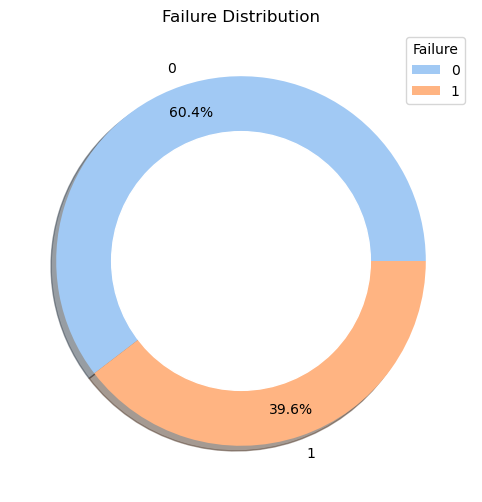

In [33]:
# Calculate the count of each gender category and store it in a dictionary
gender_counts = dict(df['Failure'].value_counts())

# Set a custom color palette for the pie chart
PALETTE = sns.color_palette("pastel")

# Create a new figure with a specified size
plt.figure(figsize=(10, 6))

# Set the title of the pie chart
plt.title("Failure Distribution")

# Create a pie chart with percentage labels, shadow effect, and custom colors
plt.pie(gender_counts.values(), labels=gender_counts.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)

# Add a legend with a title and adjust its position
plt.legend(title="Failure", labels=gender_counts.keys(), bbox_to_anchor=(1, 1))

# Add a white circle at the center to transform it into a donut chart
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.gcf().gca().add_artist(my_circle)

# Show the pie chart
plt.show()


### Histogram for Temperature

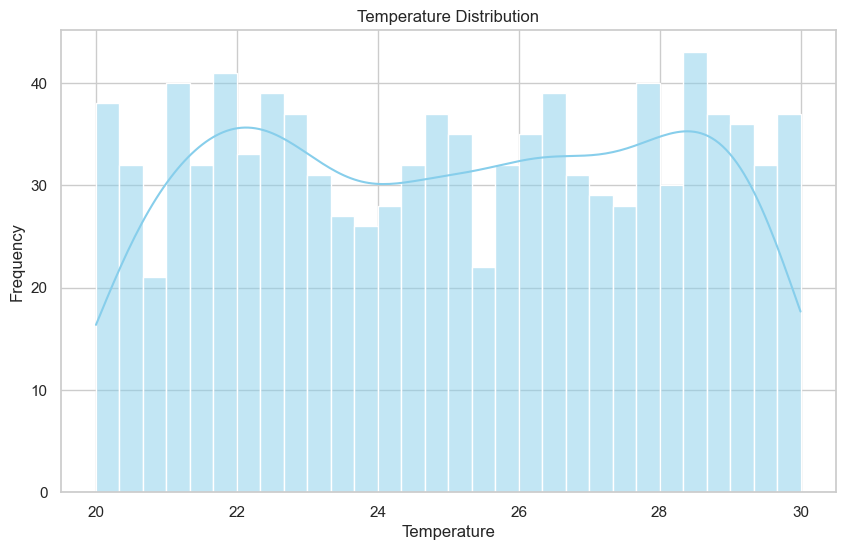

In [40]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Visualization for 'Temperature'
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature'], bins=30, kde=True, color='skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

### Histogram for Vibration

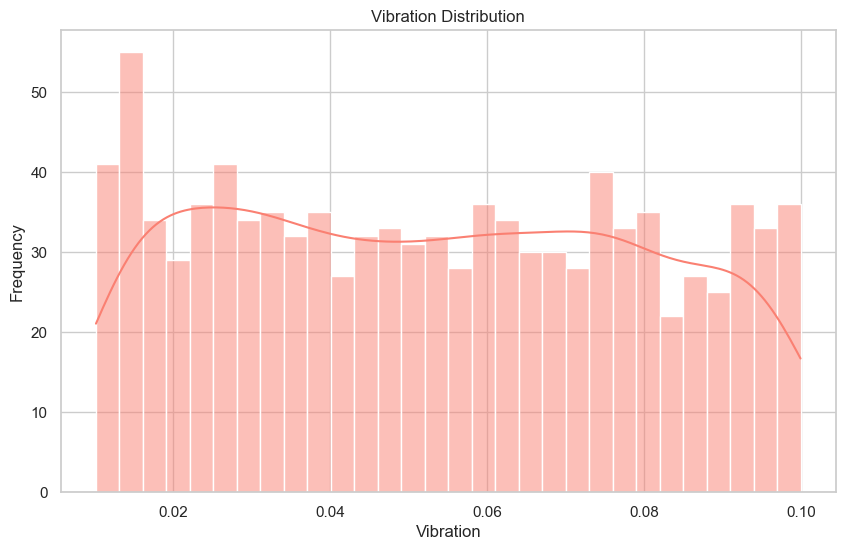

In [41]:
# Visualization for 'Vibration'
plt.figure(figsize=(10, 6))
sns.histplot(df['Vibration'], bins=30, kde=True, color='salmon')
plt.title('Vibration Distribution')
plt.xlabel('Vibration')
plt.ylabel('Frequency')
plt.show()

### Histogram for Usage Hours

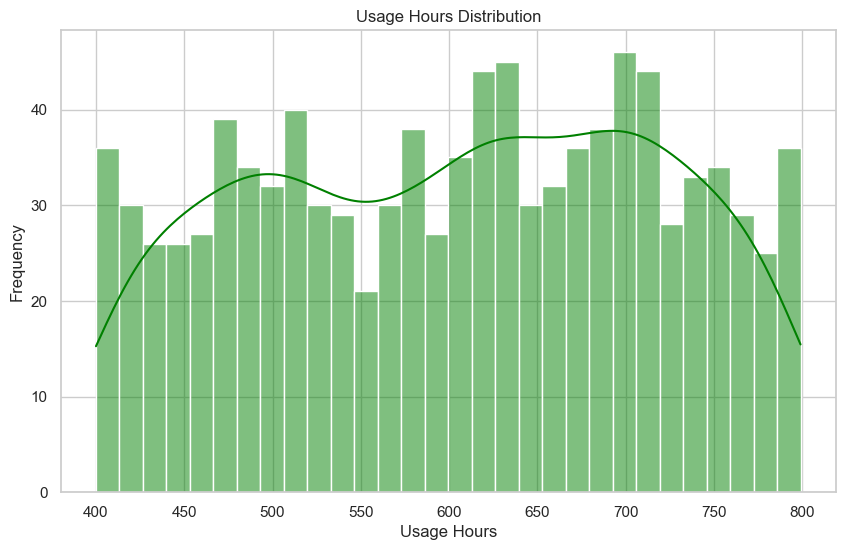

In [42]:
# Visualization for 'UsageHours'
plt.figure(figsize=(10, 6))
sns.histplot(df['UsageHours'], bins=30, kde=True, color='green')
plt.title('Usage Hours Distribution')
plt.xlabel('Usage Hours')
plt.ylabel('Frequency')
plt.show()

### Histogram for Maintenance Cost

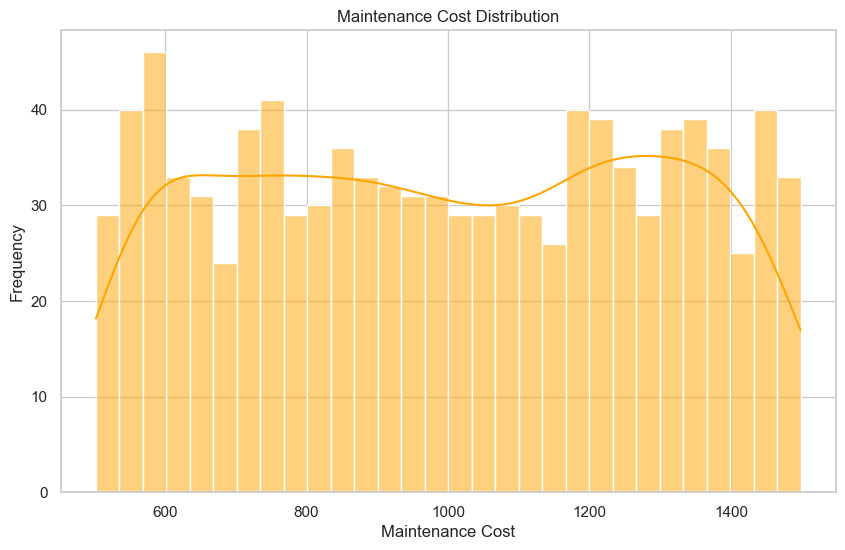

In [44]:
# Visualization for 'MaintenanceCost'
plt.figure(figsize=(10, 6))
sns.histplot(df['MaintenanceCost'], bins=30, kde=True, color='orange')
plt.title('Maintenance Cost Distribution')
plt.xlabel('Maintenance Cost')
plt.ylabel('Frequency')
plt.show()

### Count Plot for Failure

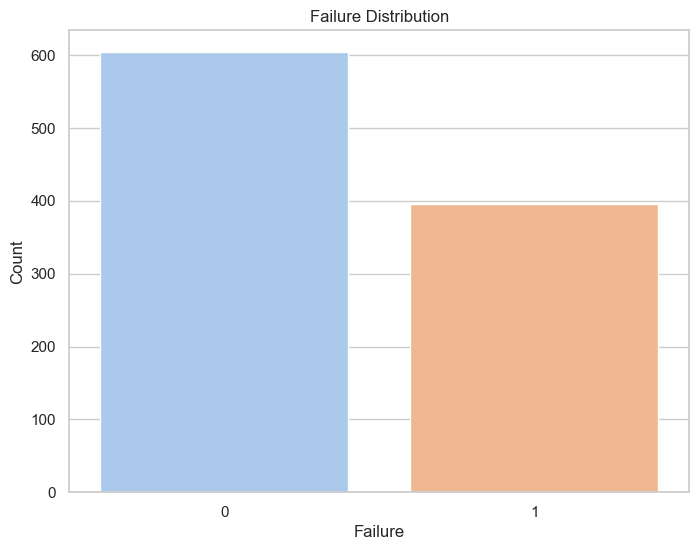

In [46]:
# Visualization for 'Failure'
plt.figure(figsize=(8, 6))
sns.countplot(x='Failure', data=df, palette='pastel')
plt.title('Failure Distribution')
plt.xlabel('Failure')
plt.ylabel('Count')
plt.show()

### Correlation Matrix

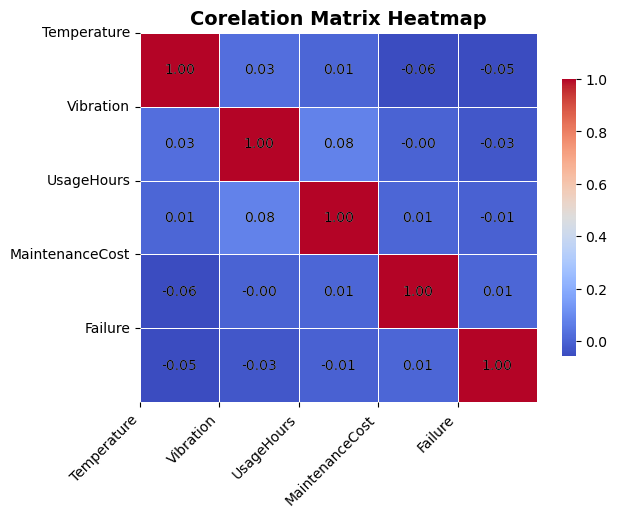

In [18]:
# List of numerical columns in the DataFrame
df_numerical = ['Timestamp','Temperature','Vibration','UsageHours','MaintenanceType','MaintenanceCost','Failure']

# Extract numeric columns from the DataFrame
numeric_columns = df[df_numerical]

# Calculate the correlation matrix for the numeric columns
corr_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix using Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": 0.75})

# Iterate through the cells in the correlation matrix to add numerical annotations
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        text = '{:.2f}'.format(corr_matrix.iloc[i, j])
        plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=10)

# Set x-axis and y-axis ticks and labels
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=0)

# Set title for the heatmap
plt.title("Corelation Matrix Heatmap", fontsize=14, weight='bold')

# Show the improved heatmap
plt.show()


# 3 - TRAIN/TEST SPLIT

In [74]:
# Define the features to be used for prediction
features = ['Temperature','Vibration','UsageHours','MaintenanceType','MaintenanceCost']

#Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

# Extract the selected features (X) and the target variable (Y) from the DataFrame
X = df[features]
Y = df['Failure']



In [75]:
df.dtypes

Timestamp          datetime64[ns]
Temperature               float64
Vibration                 float64
UsageHours                  int32
MaintenanceType             int32
MaintenanceCost           float64
Failure                     int32
dtype: object

In [76]:
# Perform train-test split on the feature set (X) and target variable (Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Print the shape of the training feature set (X_train)
print("Training feature set shape:", X_train.shape)

# Print the shape of the testing feature set (X_test)
print("Testing feature set shape:", X_test.shape)

# Print the shape of the training target variable (Y_train)
print("Training target variable shape:", Y_train.shape)

# Print the shape of the testing target variable (Y_test)
print("Testing target variable shape:", Y_test.shape)

Training feature set shape: (800, 5)
Testing feature set shape: (200, 5)
Training target variable shape: (800,)
Testing target variable shape: (200,)


## 4 - FEATURE SELECTION AND ENGINEERING

### Hill Climb

In [84]:
def hill_climbing_feature_selection(X_train, X_test, Y_train, Y_test, classifier):
    selected_features = []
    best_accuracy = 0.0

    while True:
        remaining_features = list(set(X_train.columns) - set(selected_features))
        improved = False

        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_train_subset = X_train[current_features]
            X_test_subset = X_test[current_features]

            # Train the classifier
            classifier.fit(X_train_subset, Y_train)

            # Make predictions on the test set
            predictions = classifier.predict(X_test_subset)

            # Evaluate accuracy
            accuracy = accuracy_score(Y_test, predictions)

            # Update if accuracy improves
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                selected_features = current_features
                improved = True

        if not improved:
            break

    print("Selected Features:", selected_features)
    print("Best Accuracy:", best_accuracy)

    return selected_features

# Perform hill climbing for feature selection
selected_features = hill_climbing_feature_selection(X_train_scaled, X_test_scaled, Y_train, Y_test, knn_classifier)

print("Final Selected Features:", selected_features)


Selected Features: ['Temperature', 'MaintenanceType']
Best Accuracy: 0.54
Final Selected Features: ['Temperature', 'MaintenanceType']


### Random Forest  Regressor

In [118]:
model = RandomForestRegressor()
model.fit(X,Y)
feature_importances = model.feature_importances_

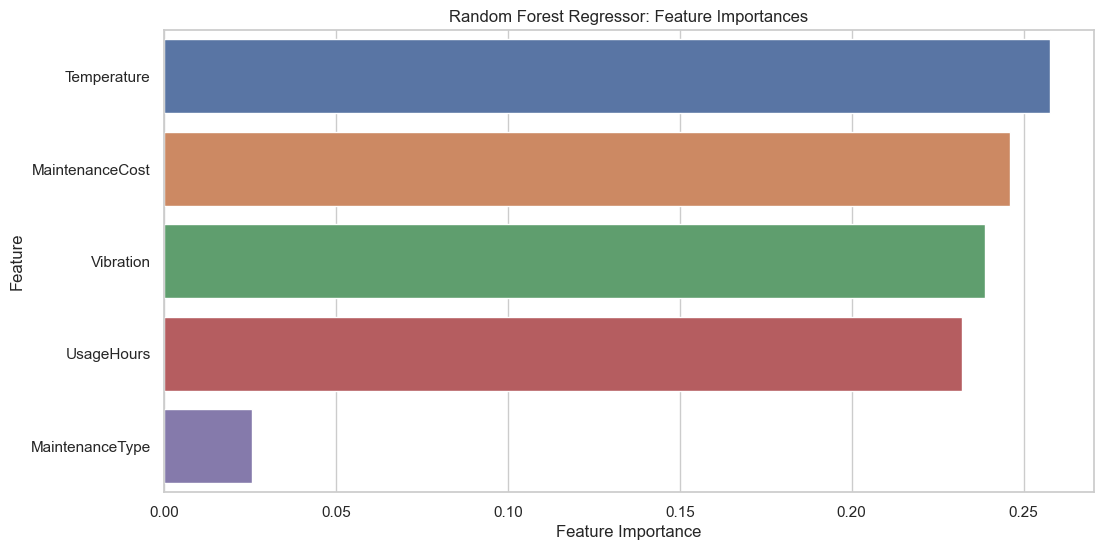

In [119]:
# Feature importances bar plot
sorted_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices])
plt.title('Random Forest Regressor: Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# 5 & 6 - MODEL IMPLEMENTATION  AND EVALUATION

In [150]:
selected_features = ['Temperature','Vibration','UsageHours','MaintenanceCost']

### KNeighbors Classifier (KNN)

In [151]:
# Record the start time for training
start_time_knn = time.time()

# Create an instance of the KNeighborsClassifier with specified parameters
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train (fit) the KNeighborsClassifier on the training data (features: X_train, target variable: Y_train)
knn_classifier.fit(X_train[selected_features], Y_train)

# Calculate the training time
training_time_knn = time.time() - start_time_knn

print(f"Training time (KNeighborsClassifier): {training_time_knn:.4f} seconds")

# Print a message indicating that the KNeighborsClassifier has been trained successfully
print("K-Nearest Neighbors Classifier trained successfully!")


Training time (KNeighborsClassifier): 0.0078 seconds
K-Nearest Neighbors Classifier trained successfully!


In [152]:
# Make predictions on the test set using the trained KNeighborsClassifier
Y_pred_knn = knn_classifier.predict(X_test[selected_features])

# Calculate the accuracy of the model by comparing predicted and actual values
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)

# Generate the confusion matrix to evaluate the performance of the classification model
confusion_knn = confusion_matrix(Y_test, Y_pred_knn)

# Generate a classification report, including precision, recall, and F1-score
classification_rep_knn = classification_report(Y_test, Y_pred_knn)

# Save the sample results to a CSV file
sample_results = pd.DataFrame({'True Outcome': Y_test, 'Predicted Outcome': Y_pred_knn})
sample_results.to_csv('knn_classifier_sample_results.csv', index=False)

# Print the accuracy of the model
print("Accuracy (KNN):", accuracy_knn)

# Print the confusion matrix
print("Confusion Matrix (KNN):\n", confusion_knn)

# Print the classification report
print("Classification Report (KNN):\n", classification_rep_knn)

Accuracy (KNN): 0.52
Confusion Matrix (KNN):
 [[79 47]
 [49 25]]
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.62      0.63      0.62       126
           1       0.35      0.34      0.34        74

    accuracy                           0.52       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.52      0.52      0.52       200



###  Decision Tree Classifier

In [153]:
# Record the start time for training
start_time_dt = time.time()

# Create an instance of the DecisionTreeClassifier with specified parameters
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train (fit) the DecisionTreeClassifier on the training data (features: X_train, target variable: Y_train)
dt_classifier.fit(X_train[selected_features], Y_train)

# Calculate the training time
training_time_dt = time.time() - start_time_dt
print(f"Training time (Decision Tree): {training_time_dt:.4f} seconds")

# Print a message indicating that the DecisionTreeClassifier has been trained successfully
print("Decision Tree Classifier trained successfully!")

Training time (Decision Tree): 0.0104 seconds
Decision Tree Classifier trained successfully!


In [154]:
# Make predictions on the test set using the trained DecisionTreeClassifier
Y_pred_dt = dt_classifier.predict(X_test[selected_features])

# Calculate the accuracy of the model by comparing predicted and actual values
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)

# Generate the confusion matrix to evaluate the performance of the classification model
confusion_dt = confusion_matrix(Y_test, Y_pred_dt)

# Generate a classification report, including precision, recall, and F1-score
classification_rep_dt = classification_report(Y_test, Y_pred_dt)

# Save the sample results to a CSV file
sample_results = pd.DataFrame({'True Outcome': Y_test, 'Predicted Outcome': Y_pred_dt})
sample_results.to_csv('dt_classifier_sample_results.csv', index=False)

# Print the accuracy of the model
print("Accuracy (Decision Tree):", accuracy_dt)

# Print the confusion matrix
print("Confusion Matrix (Decision Tree):\n", confusion_dt)

# Print the classification report
print("Classification Report (Decision Tree):\n", classification_rep_dt)

Accuracy (Decision Tree): 0.53
Confusion Matrix (Decision Tree):
 [[69 57]
 [37 37]]
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.65      0.55      0.59       126
           1       0.39      0.50      0.44        74

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.56      0.53      0.54       200



### Gaussian Naive Bayes classifier

In [155]:
# Record the start time for training
start_time_nb = time.time()

# Create an instance of the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train (fit) the Naive Bayes classifier on the training data (features: X_train, target variable: Y_train)
nb_classifier.fit(X_train[selected_features], Y_train)

# Calculate the training time
training_time_nb = time.time() - start_time_nb
print(f"Training time (Naive Bayes): {training_time_nb:.4f} seconds")

# Print a message indicating that the Naive Bayes classifier has been trained successfully
print("Naive Bayes Classifier trained successfully!")

Training time (Naive Bayes): 0.0069 seconds
Naive Bayes Classifier trained successfully!


In [156]:
# Make predictions on the test set using the trained Naive Bayes classifier
Y_pred_nb = nb_classifier.predict(X_test[selected_features])

# Calculate the accuracy of the model by comparing predicted and actual values
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)

# Generate the confusion matrix to evaluate the performance of the classification model
confusion_nb = confusion_matrix(Y_test, Y_pred_nb)

# Generate a classification report, including precision, recall, and F1-score
classification_rep_nb = classification_report(Y_test, Y_pred_nb)

# Save the sample results to a CSV file
sample_results_nb = pd.DataFrame({'True Outcome': Y_test, 'Predicted Outcome': Y_pred_nb})
sample_results_nb.to_csv('nb_classifier_sample_results.csv', index=False)

# Print the accuracy of the Naive Bayes model
print("Accuracy (Naive Bayes):", accuracy_nb)

# Print the confusion matrix for Naive Bayes
print("Confusion Matrix (Naive Bayes):\n", confusion_nb)

# Print the classification report for Naive Bayes
print("Classification Report (Naive Bayes):\n", classification_rep_nb)

Accuracy (Naive Bayes): 0.63
Confusion Matrix (Naive Bayes):
 [[126   0]
 [ 74   0]]
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       126
           1       0.00      0.00      0.00        74

    accuracy                           0.63       200
   macro avg       0.32      0.50      0.39       200
weighted avg       0.40      0.63      0.49       200



### Neural Network Classifier

In [157]:
# Record the start time for training
start_time_nn = time.time()

# Create an instance of the MLPClassifier with specified parameters
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train (fit) the MLPClassifier on the training data (features: X_train, target variable: Y_train)
nn_classifier.fit(X_train[selected_features], Y_train)

# Calculate the training time
training_time_nn = time.time() - start_time_nn
print(f"Training time (Neural Network): {training_time_nn:.4f} seconds")

# Print a message indicating that the Neural Network has been trained successfully
print("Neural Network Classifier trained successfully!")

Training time (Neural Network): 0.3549 seconds
Neural Network Classifier trained successfully!


In [158]:
# Make predictions on the test set using the trained Neural Network
Y_pred_nn = nn_classifier.predict(X_test[selected_features])

# Calculate the accuracy of the model by comparing predicted and actual values
accuracy_nn = accuracy_score(Y_test, Y_pred_nn)

# Generate the confusion matrix to evaluate the performance of the classification model
confusion_nn = confusion_matrix(Y_test, Y_pred_nn)

# Generate a classification report, including precision, recall, and F1-score
classification_rep_nn = classification_report(Y_test, Y_pred_nn)

# Save the sample results to a CSV file
sample_results_nn = pd.DataFrame({'True Outcome': Y_test, 'Predicted Outcome': Y_pred_nn})
sample_results_nn.to_csv('nn_classifier_sample_results.csv', index=False)

# Print the accuracy of the Neural Network model
print("Accuracy (Neural Network):", accuracy_nn)

# Print the confusion matrix for Neural Network
print("Confusion Matrix (Neural Network):\n", confusion_nn)

# Print the classification report for Neural Network
print("Classification Report (Neural Network):\n", classification_rep_nn)

Accuracy (Neural Network): 0.63
Confusion Matrix (Neural Network):
 [[126   0]
 [ 74   0]]
Classification Report (Neural Network):
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       126
           1       0.00      0.00      0.00        74

    accuracy                           0.63       200
   macro avg       0.32      0.50      0.39       200
weighted avg       0.40      0.63      0.49       200



## 7 - RESULTS VISUALIZATION AND ANALYSIS

### KNeighbors Classifier (KNN)

KNN Sample Results:
    True Outcome  Predicted Outcome
0             0                  0
1             0                  0
2             1                  0
3             0                  1
4             1                  0


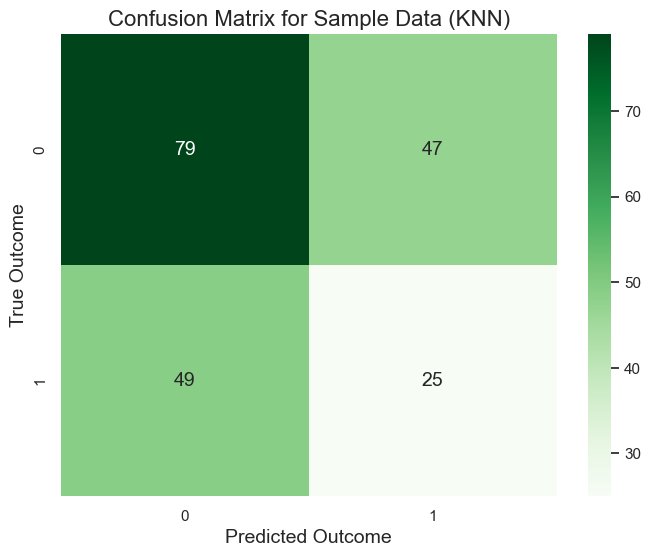

In [159]:
# Read the sample results from the CSV file
sample_results_knn = pd.read_csv('knn_classifier_sample_results.csv')

# Visualize the first few rows of the DataFrame
print("KNN Sample Results:\n", sample_results_knn.head())

# Visualize the confusion matrix as a heatmap for the sample data (KNN)
confusion_knn = confusion_matrix(sample_results_knn['True Outcome'], sample_results_knn['Predicted Outcome'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_knn, annot=True, fmt='d', cmap='Greens', annot_kws={'size': 14})
plt.title('Confusion Matrix for Sample Data (KNN)', fontsize=16)
plt.xlabel('Predicted Outcome', fontsize=14)
plt.ylabel('True Outcome', fontsize=14)
plt.show()

# Discuss the strengths and limitations of the implemented KNN model on the sample data
# Emphasize interpretability and implications of the model

### Decision Tree Classifier

Decision Tree Sample Results:
    True Outcome  Predicted Outcome
0             0                  1
1             0                  0
2             1                  0
3             0                  0
4             1                  1


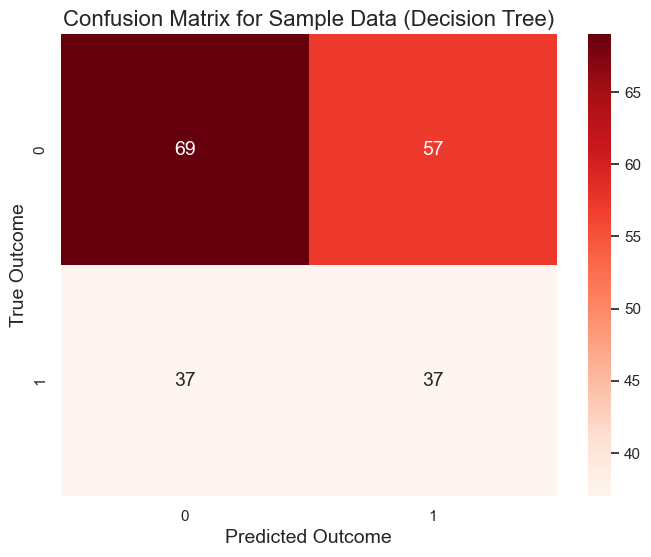

In [160]:
# Read the sample results from the CSV file
sample_results_dt = pd.read_csv('dt_classifier_sample_results.csv')

# Visualize the first few rows of the DataFrame
print("Decision Tree Sample Results:\n", sample_results_dt.head())

# Visualize the confusion matrix as a heatmap for the sample data (Decision Tree)
confusion_dt = confusion_matrix(sample_results_dt['True Outcome'], sample_results_dt['Predicted Outcome'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_dt, annot=True, fmt='d', cmap='Reds', annot_kws={'size': 14})
plt.title('Confusion Matrix for Sample Data (Decision Tree)', fontsize=16)
plt.xlabel('Predicted Outcome', fontsize=14)
plt.ylabel('True Outcome', fontsize=14)
plt.show()

# Discuss the strengths and limitations of the implemented Decision Tree model on the sample data
# Emphasize interpretability and implications of the model

### Gaussian Naive Bayes classifier

Naive Bayes Sample Results:
    True Outcome  Predicted Outcome
0             0                  0
1             0                  0
2             1                  0
3             0                  0
4             1                  0


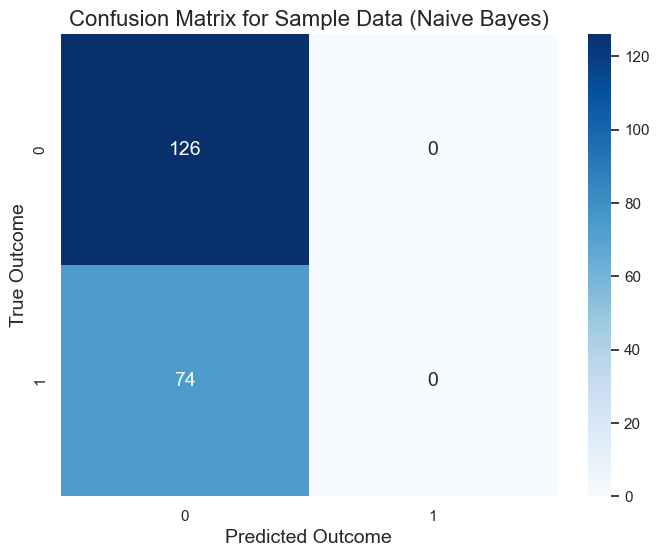

In [161]:
# Read the sample results from the CSV file for Naive Bayes
sample_results_nb = pd.read_csv('nb_classifier_sample_results.csv')

# Visualize the first few rows of the DataFrame for Naive Bayes
print("Naive Bayes Sample Results:\n", sample_results_nb.head())

# Visualize the confusion matrix as a heatmap for the sample data (Naive Bayes)
confusion_nb = confusion_matrix(sample_results_nb['True Outcome'], sample_results_nb['Predicted Outcome'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_nb, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14})
plt.title('Confusion Matrix for Sample Data (Naive Bayes)', fontsize=16)
plt.xlabel('Predicted Outcome', fontsize=14)
plt.ylabel('True Outcome', fontsize=14)
plt.show()

# Discuss the strengths and limitations of the implemented Naive Bayes model on the sample data
# Highlight characteristics such as simplicity and handling of categorical features

### Neural Network Classifier

Neural Network Sample Results:
    True Outcome  Predicted Outcome
0             0                  0
1             0                  0
2             1                  0
3             0                  0
4             1                  0


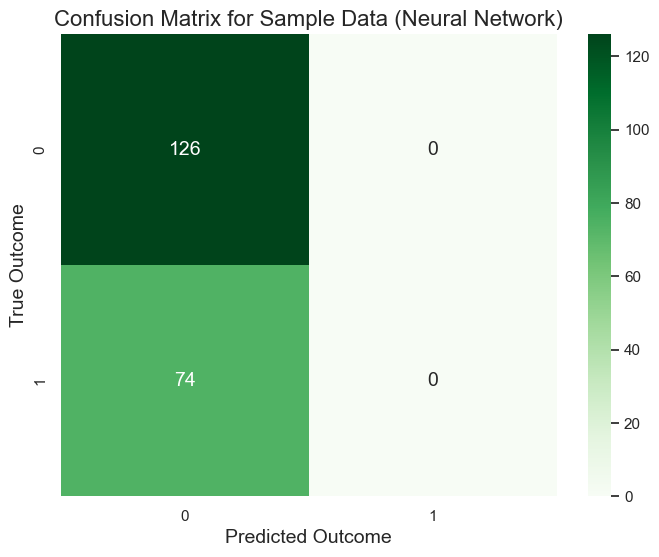

In [162]:
# Read the sample results from the CSV file for Neural Network
sample_results_nn = pd.read_csv('nn_classifier_sample_results.csv')

# Visualize the first few rows of the DataFrame for Neural Network
print("Neural Network Sample Results:\n", sample_results_nn.head())

# Visualize the confusion matrix as a heatmap for the sample data (Neural Network)
confusion_nn = confusion_matrix(sample_results_nn['True Outcome'], sample_results_nn['Predicted Outcome'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_nn, annot=True, fmt='d', cmap='Greens', annot_kws={'size': 14})
plt.title('Confusion Matrix for Sample Data (Neural Network)', fontsize=16)
plt.xlabel('Predicted Outcome', fontsize=14)
plt.ylabel('True Outcome', fontsize=14)
plt.show()

# Discuss the strengths and limitations of the implemented Neural Network model on the sample data
# Emphasize complexity, ability to capture non-linear relationships, and potential for overfitting

## Comparison

In [163]:
# Print the accuracy of the model
print("Accuracy (KNeighbor Classifier):", accuracy_knn)
print("Accuracy (Decision Tree):", accuracy_dt)
print("Accuracy (Naive Bayes):", accuracy_nb)
print("Accuracy (Neural Network):", accuracy_nn)

Accuracy (KNeighbor Classifier): 0.52
Accuracy (Decision Tree): 0.53
Accuracy (Naive Bayes): 0.63
Accuracy (Neural Network): 0.63


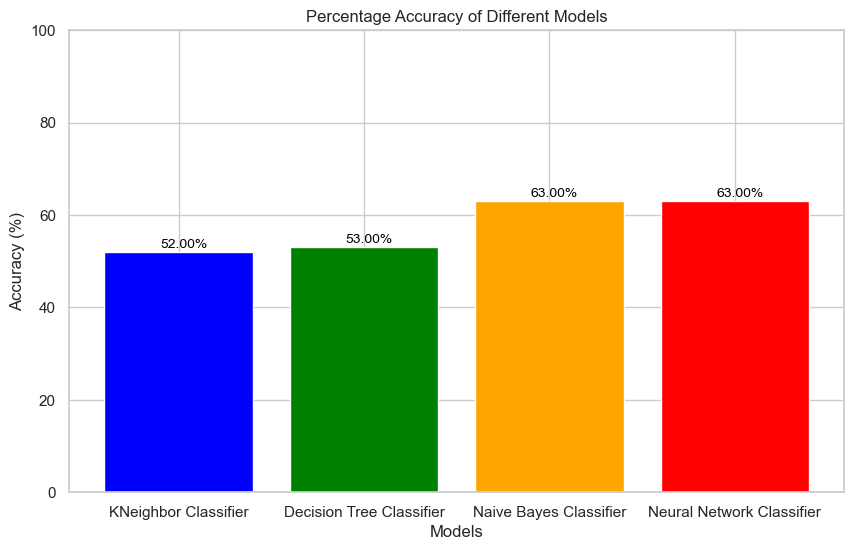

In [164]:
# Calculate percentage accuracies
accuracies = [accuracy_knn,accuracy_dt,accuracy_nb,accuracy_nn]
models = ['KNeighbor Classifier','Decision Tree Classifier','Naive Bayes Classifier','Neural Network Classifier']

percentage_accuracies = [accuracy * 100 for accuracy in accuracies]

# Create a bar chart with percentage accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(models, percentage_accuracies, color=['blue', 'green', 'orange', 'red'])

# Add text labels with the exact percentage values on top of the bars
for bar, percentage in zip(bars, percentage_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1,
             f'{percentage:.2f}%', fontsize=10, color='black')

plt.title('Percentage Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit between 0 and 100 for percentage values
plt.show()